In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

Question 
1. Display Top 5 Rows of The Dataset
2. Check the Last 3 Rows of The Dataset
3. Find Shape of Our Dataset (Number of Rows & Number of Columns)
4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
5. Get Overall Statistics About The Dataframe
6. Data Filtering
7. Check Null Values In The Dataset
8. Drop the Column
9. Handle Missing Values
10. Categorical Data Encoding
11. What is Univariate Analysis?
How Many People Survived And How Many Died?
How Many Passengers Were In First Class, Second Class, and Third Class?
Number of Male And Female Passengers
12. Bivariate Analysis
How Has Better Chance of Survival Male or Female?
Which Passenger Class Has Better Chance of Survival (First, Second, Or Third Class)? 
13. Feature Engineering

Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [175]:
df=pd.read_csv("train_pj4.csv")

In [176]:
#1 display top 3 rows of the dataset
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [177]:
#2 display last 3 rows of the dataset
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [178]:
#3 find shape of the dataset
df.shape

(891, 12)

In [179]:
print("no of rows: ",df.shape[0])
print("no of columns: ",df.shape[1])

no of rows:  891
no of columns:  12


In [180]:
#4 get inforamatiomn about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [181]:
#5 get overall statistics about the dataset
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [182]:
#6 data filtering
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [183]:
#info of males in the dataset
df[df['Sex']=="male"].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [184]:
#how many men survived
sur_male=len(df[(df['Sex']=='male') & (df['Survived']==1)])
print("no of males who survived: ", sur_male)

no of males who survived:  109


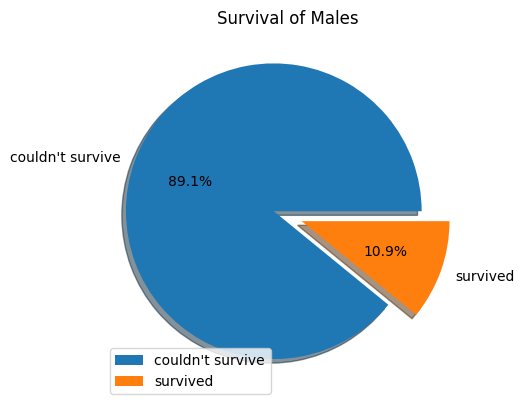

In [185]:
sur_male=len(df[(df['Sex']=='male') & (df['Survived']==1)])
ar=np.array([len(df["Sex"]=="male"),sur_male])
my_labels=["couldn't survive","survived"]
plt.pie(ar, labels=my_labels, autopct='%.1f%%', shadow=True, explode=[0.1,0.1])
plt.title("Survival of Males")
plt.legend(loc="lower left")
plt.show()

In [186]:
sum((df['Sex']=='male') & (df['Survived']==1))

109

In [187]:
#7 check null values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

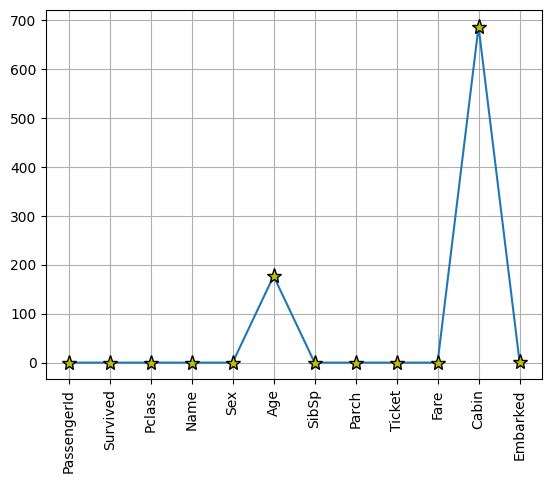

In [188]:
plt.plot(df.isnull().sum(), "*-", ms=11, mec="k", mfc="y")
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [189]:
per_missing= df.isnull().sum() * 100 / len(df)
print("percentage of missing values: \n", per_missing,"% ",sep="")

percentage of missing values: 
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64% 


In [190]:
#8 drop the columns 
df.drop('Cabin', axis=1, inplace=True)

In [191]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [192]:
#9 handle missing values

In [193]:
#lets first work on embarked
print("most appeared value: ", df['Embarked'].value_counts().idxmax())
print("most appeared value count: ", df['Embarked'].value_counts().max())

most appeared value:  S
most appeared value count:  644


In [194]:
df['Embarked']=df['Embarked'].fillna('S')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [195]:
#handling missing values in age 
df['Age']=df['Age'].interpolate()

In [196]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [197]:
#10 categorical data encoding

In [198]:
#for sex column
df['Gender']=df['Sex'].map({'male':1, 'female':0})
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1


In [199]:
x=df['Sex'].map({'male':1, 'female':0})
#df.insert(location, column name, values)
df.insert(5, "Gender_new", x)
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.25,S,1


In [200]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [201]:
df=pd.get_dummies(df,columns=['Embarked'], dtype='int')
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.25,1,0,0,1


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Gender_new   891 non-null    int64  
 6   Age          891 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Gender       891 non-null    int64  
 12  Embarked_C   891 non-null    int32  
 13  Embarked_Q   891 non-null    int32  
 14  Embarked_S   891 non-null    int32  
dtypes: float64(2), int32(3), int64(7), object(3)
memory usage: 94.1+ KB


In [203]:
"""11. What is Univariate Analysis?
How Many People Survived And How Many Died?
How Many Passengers Were In First Class, Second Class, and Third Class?
Number of Male And Female Passengers"""

'11. What is Univariate Analysis?\nHow Many People Survived And How Many Died?\nHow Many Passengers Were In First Class, Second Class, and Third Class?\nNumber of Male And Female Passengers'

In [204]:
#How Many People Survived And How Many Died?
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

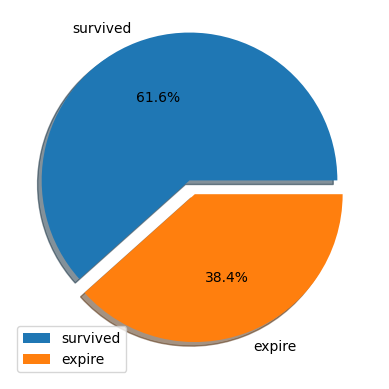

In [220]:
plt.pie(df['Survived'].value_counts(), autopct='%.1f%%', labels=["survived","expire"], explode=[0.1,0.0], shadow=True)
plt.legend()
plt.show()

In [206]:
#How Many Passengers Were In First Class, Second Class, and Third Class?
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

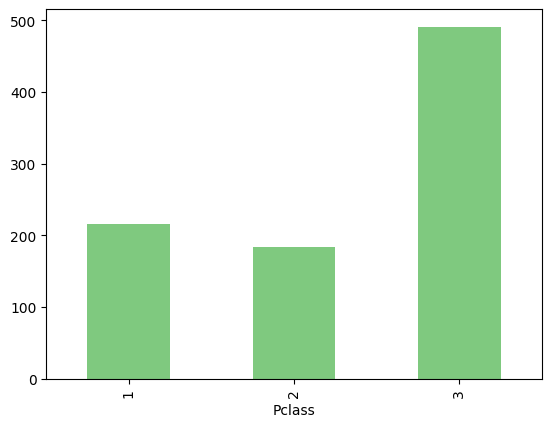

In [207]:
df['Pclass'].value_counts().sort_index(ascending=True).plot(kind='bar', colormap='Accent')

In [208]:
#Number of Male And Female Passengers
m=df['Sex'].value_counts().max()
f=df['Sex'].value_counts().min()
print("no of male passengers: ",m)
print("no of female passengers: ",f)

no of male passengers:  577
no of female passengers:  314


Text(0.5, 1.0, 'Sex Distribution')

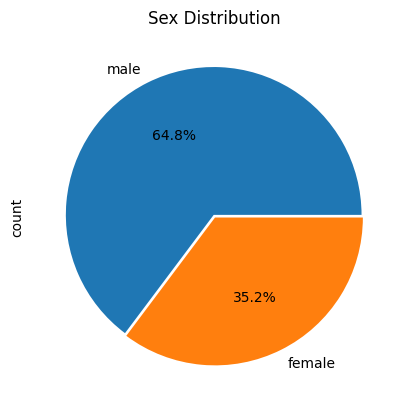

In [218]:
df['Sex'].value_counts().plot(kind='pie', autopct="%0.1f%%", explode=[0.01,0.01])
plt.title('Sex Distribution')


12. Bivariate Analysis
How Has Better Chance of Survival Male or Female?
Which Passenger Class Has Better Chance of Survival (First, Second, Or Third Class)?

female  has more chance of survival.


<Axes: xlabel='Sex'>

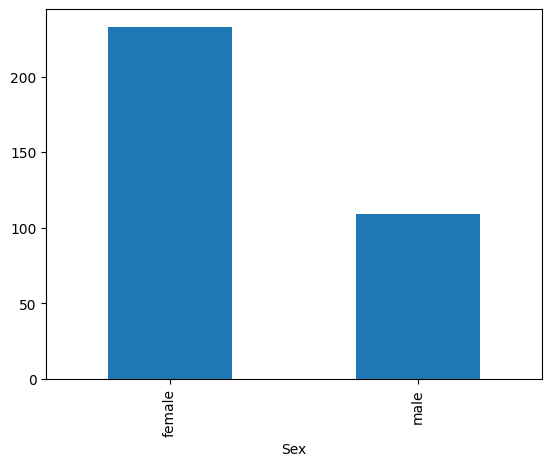

In [210]:
#who has better chance of survival male or female
more_chance=df.groupby('Sex')['Survived'].sum().idxmax()
print(more_chance," has more chance of survival.")
df.groupby('Sex')['Survived'].sum().plot(kind='bar')

class  1  has more chance of survival.


<Axes: xlabel='Pclass'>

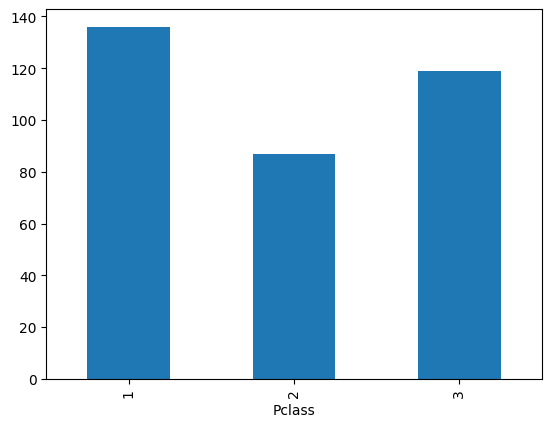

In [211]:
#Which Passenger Class Has Better Chance of Survival (First, Second, Or Third Class)?
better_chance=df.groupby('Pclass')['Survived'].sum().idxmax()
print("class ",better_chance," has more chance of survival.")
df.groupby('Pclass')['Survived'].sum().plot(kind='bar')

In [212]:
#13. feature engineering it  is the process of using domain knowledge to extract features frow raw data by data mining techniques
df['family_size']=df['Parch']+df['SibSp']
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.2500,1,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.0,1,0,PC 17599,71.2833,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,35.0,1,0,113803,53.1000,0,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",male,1,35.0,0,0,373450,8.0500,1,0,0,1,0
5,6,0,3,"Moran, Mr. James",male,1,44.5,0,0,330877,8.4583,1,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,1,54.0,0,0,17463,51.8625,1,0,0,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,1,2.0,3,1,349909,21.0750,1,0,0,1,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,27.0,0,2,347742,11.1333,0,0,0,1,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0,14.0,1,0,237736,30.0708,0,1,0,0,1


In [213]:
df["Fare_per_person"]=df['Fare'] / (df['family_size'] + 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S,family_size,Fare_per_person
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.2500,1,0,0,1,1,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.0,1,0,PC 17599,71.2833,0,1,0,0,1,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1,0,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,35.0,1,0,113803,53.1000,0,0,0,1,1,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,1,35.0,0,0,373450,8.0500,1,0,0,1,0,8.05000
